# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
car = pd.read_csv('data/vehicles.csv')

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
car.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
car.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [6]:
# Used isnull function to get the null values and sum function to get the count of rows for null values. 
null_counts = car.isnull().sum()
# Then filtered the data to greater than 0 to only get the columns with null values.
columns_with_null = null_counts[null_counts > 0]
print(columns_with_null)

year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64


In [7]:
#Analyzed the data in the columns
value_counts = car['region'].value_counts()
print(value_counts)

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64


In [8]:
#Analyzed the data in the columns
value_counts = car['price'].value_counts()
print(value_counts)

0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
131          1
4225         1
28559        1
34450        1
20354        1
Name: price, Length: 15655, dtype: int64


In [9]:
#Analyzed the data in the columns
value_counts = car['year'].value_counts()
print(value_counts)

2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1918.0        1
Name: year, Length: 114, dtype: int64


In [10]:
#Analyzed the data in the columns
value_counts = car['manufacturer'].value_counts()
print(value_counts)

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [11]:
#Analyzed the data in the columns
value_counts = car['model'].value_counts()
print(value_counts)

f-150                                     8009
silverado 1500                            5140
1500                                      4211
camry                                     3135
silverado                                 3023
                                          ... 
susuki grand vitara                          1
2500 st crew cab                             1
gt350                                        1
sierra 2500hd 4wd crew cab 159" denali       1
xt5 fwd 4dr premium luxury                   1
Name: model, Length: 29649, dtype: int64


In [12]:
#Analyzed the data in the columns
value_counts = car['condition'].value_counts()
print(value_counts)

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64


In [13]:
#Analyzed the data in the columns
value_counts = car['cylinders'].value_counts()
print(value_counts)

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64


In [14]:
#Analyzed the data in the columns
value_counts = car['fuel'].value_counts()
print(value_counts)

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64


In [15]:
#Analyzed the data in the columns
value_counts = car['odometer'].value_counts()
print(value_counts)

100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
236112.0       1
197271.0       1
25395.0        1
61511.0        1
128344.0       1
Name: odometer, Length: 104870, dtype: int64


In [16]:
#Analyzed the data in the columns
value_counts = car['title_status'].value_counts()
print(value_counts)

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64


In [17]:
#Analyzed the data in the columns
value_counts = car['transmission'].value_counts()
print(value_counts)

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64


In [18]:
#Analyzed the data in the columns
value_counts = car['drive'].value_counts()
print(value_counts)

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64


In [19]:
#Analyzed the data in the columns
value_counts = car['size'].value_counts()
print(value_counts)

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64


In [20]:
#Analyzed the data in the columns
value_counts = car['type'].value_counts()
print(value_counts)

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64


In [21]:
#Analyzed the data in the columns
value_counts = car['paint_color'].value_counts()
print(value_counts)

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64


In [22]:
#Analyzed the data in the columns
value_counts = car['state'].value_counts()
print(value_counts)

ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: state, dtype: int64


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [23]:
# dropping some columns as decided above
car = car.drop(['id', 'VIN', 'size', 'region'], axis = 1)

In [24]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


In [25]:
# dropping the rows with null values in some columns as decided above
columns_to_check = ['year','manufacturer','model','odometer','drive','paint_color']
car = car.dropna(subset = columns_to_check)

In [26]:
# replacing null values in some columns as decided above
car = car.fillna({'condition':'other','cylinders':'other','fuel':'other','title_status':'missing','transmission':'other','type':'other'})

In [27]:
# Filtered the data to 1 state for modelling
car_ca = car[car['state'] == 'ca']

In [28]:
# Inspected the dataset
car_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25287 entries, 21171 to 71783
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         25287 non-null  int64  
 1   year          25287 non-null  float64
 2   manufacturer  25287 non-null  object 
 3   model         25287 non-null  object 
 4   condition     25287 non-null  object 
 5   cylinders     25287 non-null  object 
 6   fuel          25287 non-null  object 
 7   odometer      25287 non-null  float64
 8   title_status  25287 non-null  object 
 9   transmission  25287 non-null  object 
 10  drive         25287 non-null  object 
 11  type          25287 non-null  object 
 12  paint_color   25287 non-null  object 
 13  state         25287 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.9+ MB


In [29]:
# Creating X and y datasets
X = car_ca.drop('price', axis = 1)
y = car_ca['price']

In [30]:
# Define column transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()
numerical_cols = ['year', 'odometer']
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
    remainder='passthrough')

In [31]:
# Splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [32]:
# Create a pipeline with Linear regression
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('linreg', LinearRegression())
])
pipe_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state'])])),
                ('linreg', LinearRegression())])

In [33]:
# Finding the mean squared error
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", lr_mse)

Mean Squared Error: 162713149266121.84


In [34]:
# Finding the best features using the permutation importance method
r = permutation_importance(pipe_lr, X_test, y_test, n_repeats=10, random_state=0)
feature_names = []
importances = []
std_devs = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        feature_names.append(car_ca.columns[i])
        importances.append(r.importances_mean[i])
        std_devs.append(r.importances_std[i])

# Create the DataFrame
importance_df = pd.DataFrame({'Feature': feature_names,
                              'Mean': importances,
                              'Std Dev': std_devs})
importance_df

,Feature,Mean,Std Dev
0,cylinders,1.085949e-05,3.609264e-06
1,drive,9.460396e-06,3.671846e-06
2,title_status,2.072419e-08,2.993161e-09
3,odometer,2.500818e-09,7.638719e-10


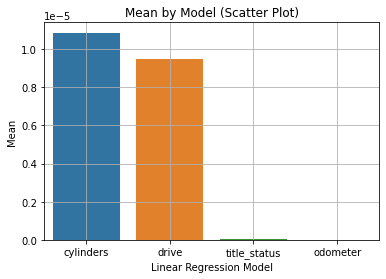

In [35]:
#Create a line plot of mses using seaborn
sns.barplot(x='Feature', y='Mean', data=importance_df)
plt.title('Mean by Model (Scatter Plot)')
plt.xlabel('Linear Regression Model')
plt.ylabel('Mean')
plt.grid(True)
plt.show()

In [36]:
# Create a pipeline with Ridge regression
pipe_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])
pipe_ridge

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state'])])),
                ('ridge', Ridge())])

In [37]:
# Finding best alpha
param_grid = {'ridge__alpha': [0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(pipe_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_alpha_ridge = grid_search_ridge.best_params_['ridge__alpha']
best_alpha_ridge

1

In [38]:
# Finding the mean squared error for the best model
best_model_ridge = grid_search_ridge.best_estimator_
y_pred = best_model_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", ridge_mse)

Mean Squared Error: 162712311547259.72


In [39]:
# Finding the best features using the permutation importance method
r = permutation_importance(best_model_ridge, X_test, y_test, n_repeats=10, random_state=0)
feature_names = []
importances = []
std_devs = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        feature_names.append(car_ca.columns[i])
        importances.append(r.importances_mean[i])
        std_devs.append(r.importances_std[i])

# Create the DataFrame
importance_df_ridge = pd.DataFrame({'Feature': feature_names,
                              'Mean': importances,
                              'Std Dev': std_devs})
importance_df_ridge

,Feature,Mean,Std Dev
0,cylinders,1.291909e-05,4.288416e-06
1,drive,1.013982e-05,4.100483e-06
2,title_status,5.296548e-08,3.274998e-09
3,odometer,3.249141e-09,1.100189e-09


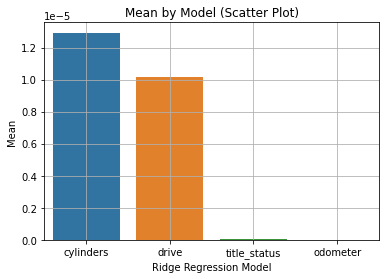

In [40]:
#Create a line plot of mses using seaborn
sns.barplot(x='Feature', y='Mean', data=importance_df_ridge)
plt.title('Mean by Model (Scatter Plot)')
plt.xlabel('Ridge Regression Model')
plt.ylabel('Mean')
plt.grid(True)
plt.show()

In [41]:
# Create a pipeline with Linear regression
pipe_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])
pipe_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'model',
                                                   'condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state'])])),
                ('lasso', Lasso())])

In [42]:
# Finding the mean squared error
pipe_lasso.fit(X_train, y_train)
y_pred = pipe_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", lasso_mse)

Mean Squared Error: 162712889068129.84


In [43]:
# Finding the best features using the permutation importance method
r = permutation_importance(pipe_lasso, X_test, y_test, n_repeats=10, random_state=0)
feature_names = []
importances = []
std_devs = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        feature_names.append(car_ca.columns[i])
        importances.append(r.importances_mean[i])
        std_devs.append(r.importances_std[i])

# Create the DataFrame
importance_df_lasso = pd.DataFrame({'Feature': feature_names,
                              'Mean': importances,
                              'Std Dev': std_devs})
importance_df_lasso

,Feature,Mean,Std Dev
0,cylinders,1.481458e-05,4.915984e-06
1,drive,1.162009e-05,4.530856e-06
2,title_status,6.407320e-08,4.660536e-09
3,odometer,3.258409e-09,8.272330e-10


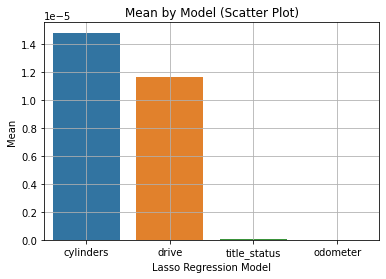

In [44]:
#Create a line plot of mses using seaborn
sns.barplot(x='Feature', y='Mean', data=importance_df_lasso)
plt.title('Mean by Model (Scatter Plot)')
plt.xlabel('Lasso Regression Model')
plt.ylabel('Mean')
plt.grid(True)
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [45]:
# Create a dataframe of mses
mses = pd.DataFrame({'model':['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
                     'mse':[lr_mse, ridge_mse, lasso_mse]})

mses

,model,mse
0,Linear Regression,1.627131e+14
1,Ridge Regression,1.627123e+14
2,Lasso Regression,1.627129e+14


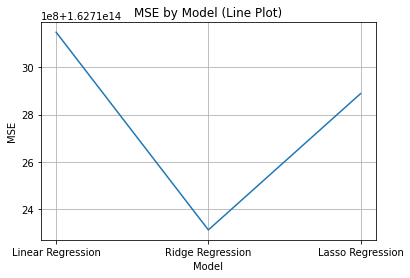

In [46]:
#Create a line plot of mses using seaborn
sns.lineplot(x='model', y='mse', data=mses)
plt.title('MSE by Model (Line Plot)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [47]:
# filtering the outliers for plots
filtered_df = car_ca[(car_ca['price'].between(100,200000))]

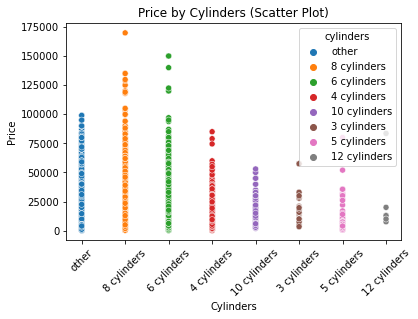

In [48]:
# line plot showing Price vs cylinders
sns.scatterplot(x='cylinders', y='price', hue = 'cylinders', data=filtered_df)
plt.title('Price by Cylinders (Scatter Plot)')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

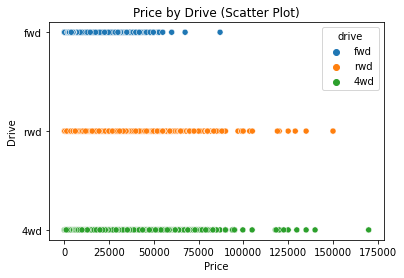

In [49]:
# line plot showing Price vs Drive
sns.scatterplot(x='price', y='drive', hue='drive', data=filtered_df)
plt.title('Price by Drive (Scatter Plot)')
plt.xlabel('Price')
plt.ylabel('Drive')
plt.show()

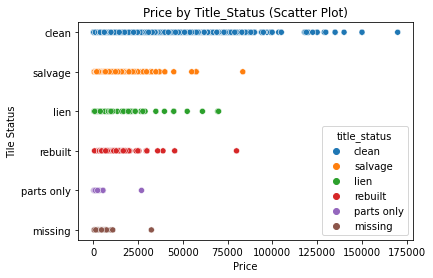

In [50]:
# line plot showing Price vs Title_Status
sns.scatterplot(x='price', y='title_status', hue='title_status', data=filtered_df)
plt.title('Price by Title_Status (Scatter Plot)')
plt.xlabel('Price')
plt.ylabel('Tile Status')
plt.show()

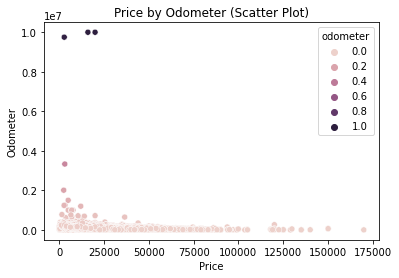

In [51]:
# line plot showing Price vs Odometer
sns.scatterplot(x='price', y='odometer', hue='odometer', data=filtered_df)
plt.title('Price by Odometer (Scatter Plot)')
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.